<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/Pandas_Exercises_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [60]:
df = pd.read_csv("database.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Hiển thị 5 dòng đầu của dữ liệu:

In [22]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


HIển thị một vài thông tin của dữ liệu:

Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

Ta dùng hàm describe() để tính toán các thông số của dữ liệu định lượng một cách nhanh chóng: Vì dữ liệu định lượng có 40 cột nên ta dùng hàm describe cho  4 phần để quan sát được đầy đủ các cột định lượng (Trừ Record ID, Incident Year, Incident Month, Incident Day):

In [34]:
numeric_data = list(df.describe().columns)[4:]
# Ta bỏ cột đàu tiên vì đó là ID

11 cột đầu tiên trong dữ liệu định lượng:

In [35]:
result = pd.DataFrame()
for i in range(0,10):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries
count,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000
mean,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,0.703738,0.046018,1.746725
std,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,3.464467,0.435164,6.571239
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,0.000000,0.000000,1.000000
75%,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,0.000000,0.000000,1.000000
max,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000


11 cột thứ 2 trong dữ liệu định lượng:

In [37]:
result = pd.DataFrame()
for i in range(10,20):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.085977,0.107757,0.009150,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168
std,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


11 cột thứ 3 trong dữ liệu định lượng:

In [38]:
result = pd.DataFrame()
for i in range(20,30):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.011619,0.003182,0.000971,0.001918,0.000425,0.055180,0.020086,0.003326,0.119159,0.024009
std,0.107166,0.056320,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


10 cột cuối cùng trong dữ liệu định lượng:

In [39]:
result = pd.DataFrame()
for i in range(30,40):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các
ngoại lệ không?nếu có thì ở cột nào?

Có 2 nguyên nhân ta sẽ không vẽ biểu đồ boxplot để xác định ngoại lệ cho các biến định lượng:
* Có nhiều biến định lượng (khoảng 40), việc quan sát hết các biến là vô cùng khó khăn, nếu vẽ từng biến từng boxplot trên từng hệ trục thì mất thời gian mà có thể không hiệu quả
* Sự xung đột về đơn vị dẫn đến việc vẽ trên cùng một hệ trục là không thể.


Hình ảnh minh họa việc bạn không nên dùng boxplot:

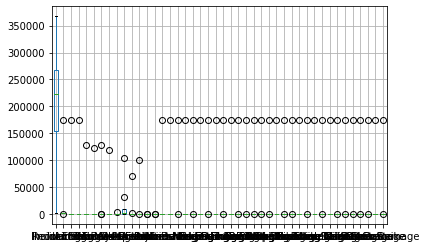

In [48]:
df.describe().boxplot();

Ta sẽ xác định ngoại lệ bằng việc xây dựng hàm như sau:

In [67]:
def define_cols_has_outlier(data, num_data):
  result = []
  for col in num_data:
    # Tính z-score bằng st.zscore 
    # Dùng vòng lặp kiểm tra trong list:
    for i in list(st.zscore(data[col])):
      if np.abs(i) > 3:
        result.append(col)
        break
  return result

Các biến định lượng có ngoại lệ là:

In [68]:
define_cols_has_outlier(df, numeric_data)

['Aircraft Damage',
 'Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Strike',
 'Landing Gear Damage',
 'Tail Strike',
 'Tail Damage',
 'Lights Strike',
 'Lights Damage',
 'Other Strike',
 'Other Damage']

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

In [49]:
def remove_at_row(data,index):
  n_row = data.shape[0]
  if index == 0:
    data = data.iloc[1:]
    data.index = [i for i in range(n_row-1)]
    return data
  if index == n_row:
    data = data.iloc[:-1]
    data.index = [i for i in range(n_row-1)]
    return data
  data = data.iloc[:index].append(data.iloc[index + 1:])
  data.index = [i for i in range(n_row-1)]
  return data

In [66]:
def remove_outlier_rows(data, num_data):
  for col in num_data:
    # Tính z-score bằng st.zscore 
    z_score_list = list(st.zscore(data[col]))
    # Dùng vòng lặp kiểm tra trong list:
    for i in range(len(z_score_list)):
      if np.abs(z_score_list[i]) > 3:
        data = remove_at_row(data, i)
        break
  return data

In [ ]:
def remove_NaN_rows(data, num_data):
  n_row = data.shape[0]
  for col in num_data:
    for i in range(n_row):
      

In [63]:
df_2 = remove_outlier_rows(df, numeric_data)